<a target="_blank" href="https://colab.research.google.com/github/ashkan-mokarian/d2l-pytorch/blob/main/chapter_preliminaries/3_probability_statistics_documentation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Probability and Statistics

In [2]:
# some essentials
import random
import torch
from torch.distributions.multinomial import Multinomial

## estimate vs. frequintist
When we say a coin has 1/2 probability being head, or tail, we are refering to a property of the coin. On the other hand, a frequentist view is based on observations and computes this value based on experiements and observation. With probability, we are estimating a property of the object, which if observed many many many many times, and it has _consistency_, it will converge to the estimated probability.

In [4]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails:", [heads, tails])

heads, tails: [58, 42]


In [7]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(total_count=100, probs=fair_probs).sample()  # call .sample() to start sampling

tensor([49., 51.])

In [9]:
# dividing by total_count gives _frequency_ of each state. Not it's probability
num_samples = 1000
counts = Multinomial(total_count=num_samples, probs=fair_probs).sample()
print(counts / num_samples)

tensor([0.5170, 0.4830])


By _law of large numbers_ and _central limit theorem_, we know that for coin toss, the frequencies of events converge to true probability with decreasing error of rate $(1/\sqrt{n})$.

In [13]:
counts = Multinomial(1, fair_probs).sample((10000,))  # sample() parameter has shape and not scalar
print("counts shape (batch, events): ", counts.shape)
cumsum_counts = counts.cumsum(dim=0)
print("cumsum_counts shape: ", cumsum_counts.shape)
estimates = cumsum_counts / cumsum_counts.sum(dim=1, keepdim=True)
estimates = estimates.numpy()

counts shape (batch, events):  torch.Size([10000, 2])
cumsum_counts shape:  torch.Size([10000, 2])


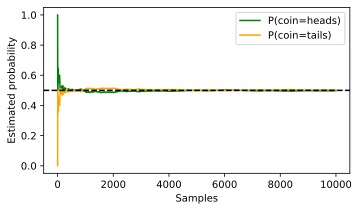

In [26]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

plt.figure(figsize=(5.5, 3))
plt.plot(estimates[:, 0], color='green', label='P(coin=heads)')
plt.plot(estimates[:, 1], color='orange', label='P(coin=tails)')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Estimated probability')
_ = plt.legend()

## Random Variable
_Sample space_ or _outcome space_: all possible states. e.g. for two tosses of coin it is {(heads, heads), (heads, tails), (tails, heads), (tails, tails)}. or for a dice it is {1, 2, 3, 4, 5, 6}.

A _Random variable_ is a mapping from the underlying sample space to a set of values. For example two RVs "whether my house was bulgarized" and "whether my home alarm goes off". Note that maybe knowing about one, can have information about the other.

RV: $X$; $X=v$ is an event, and $P(X=v)$ denotes its probability.

A good example for continous RV. e.g. height of a person. If we had exact measurements, the hight would change from morning to night, or we could show that no two humans have the exact same height. Therefore it does not make sense to speak about events at a single point for continous RV, aka probability densities. Instead we define ranges here. The probability of exact 1.80 is 0 and has no meaning.

## Bayes' Theorem
The importance is that we can reverse the conditional probability. Typically, observing/experimenting/sampling in one direction is much simpler than the reverse condition direction if not impossible. Bayes theorem makes this possible. Hard part is partition function.

$$
P(A|B)=\frac{P(B|A)P(A)}{\sum_a P(B|A=a)P(A=a)}
$$

From a bayesian statistics point of view, we think of an observer having some (subjective) **_prior_** beliefs about the plausability of the available hypothesis P(A) and a **_likelihood_** function that says how likely one is to observe any values of the collected evidence for each class of hypothesis. **Bayes' theorem** is then interpreted as telling us how to update the initial beliefs in light of available evidence (B|A) in order to produce **_posterior_** beliefs.

## Independence
You know the basic, but here is a cool example. "broken leg" and "lung cancer" might initially be independent but if conditioned on "person being in hospital", then "broken bone" reasons out why the person is in hospital and negatively correlates with "lung cancer". Hence conditioning can change independence rules.

## Uncertainty
_aleatoric_ uncertainty: implicit uncertainty, the inherent uncertainty that cannot be reduced. Even if we observe a coin toss for a long time, we cannot reduce it below 50% about the outcome.

_epistemic_ uncertainty: can be reduced e.g. by collecting more data. uncertainty arising from lack of _knowledge_.


## rate of error reduction
$1/\sqrt{n}$: by going from 10 to 1000 samples, we reduce uncertainty 10 fold. the next 1000 samples collected, has only 1.4 a large diminishing effect.

## Chebyshev inequality
$P(|x-μ|>kσ)≤1/k^2$: For example with $k=\sqrt{2}$ tells us that drawing samples from a distribution lie with at least 50% probability within the interval $[-2σ, 2σ]$ around the expectation.

# Documentation

In [27]:
# In order to know which functions and classes can ce called from a module
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution',

In [28]:
# More concise information about a class or function
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

In [29]:
# Opening help in another window
?list